In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [2]:
!pip install textblob

In [2]:
from textblob import TextBlob

In [5]:
#read dataset
comments=pd.read_csv('F:\Data Science projects\EDA_Projects\Youtube/UScomments.csv', error_bad_lines=False)
comments

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


#### sentiment analysis of youtube_comments

In [6]:
TextBlob('Logan Paul its yo big day ‼️‼️‼️').sentiment.polarity

0.0

In [7]:
comments.isna().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [10]:
comments.dropna(inplace=True)

In [8]:
## almost takes 6 mins

polarity=[] # list which will contain the polarity of the comments

for i in comments['comment_text'].dropna():
    polarity.append(TextBlob(i).sentiment.polarity)   


In [7]:
'''polarity=[] # list which will contain the polarity of the comments
## almost takes 6 mins
for i in comments['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)   
    except:
        polarity.append(0)'''

In [11]:
comments['polarity']=polarity

In [13]:
comments.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


#### Lets perform EDA for the Positve sentences

In [14]:
comments_positive = comments[comments['polarity']==1]
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [15]:
stopwords=set(STOPWORDS)

In [ ]:
total_comments= (' '.join(comments_positive['comment_text']))

wordcloud = WordCloud(width = 1000, height = 500,stopwords=stopwords).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

##### Its time to go for negative sentences

In [17]:
comments_negative = comments[comments['polarity']==-1]

In [ ]:
comments_negative= (' '.join(comments_negative['comment_text']))
wordcloud = WordCloud(width = 1000, height = 500).generate(comments_negative)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

### Analysing Tags column,what are trending tags on youtube

In [68]:
#read dataset
videos=pd.read_csv('F:\Data Science projects\EDA_Projects\Youtube/USvideos.csv', error_bad_lines=False)
videos

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09
...,...,...,...,...,...,...,...,...,...,...,...
7987,xlu6i6lT_vk,How Do MASSIVE Sinkholes Form?,Life Noggin,27,sinkhole|how do sinkholes form|sinkhole in wat...,440393,14362,390,1575,https://i.ytimg.com/vi/xlu6i6lT_vk/default.jpg,22.10
7988,qRoVlH1OcI4,Trump slams Clinton for defending NFL anthem p...,Business Insider,25,Business Insider|Donald Trump|Hillary Clinton|...,55762,1265,760,1873,https://i.ytimg.com/vi/qRoVlH1OcI4/default.jpg,22.10
7989,EoejGgUNmVU,LP - Lost On You (A Night at The McKittrick Ho...,LP,10,LP|Death Valley|Other People|Lost On You|The M...,142908,7088,68,437,https://i.ytimg.com/vi/EoejGgUNmVU/default.jpg,22.10
7990,MT1CMTI0EVw,Tré Melvin @ #YouTubeBlack FanFest Washington ...,YouTube FanFest,24,YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...,24532,2148,77,0,https://i.ytimg.com/vi/MT1CMTI0EVw/default.jpg,22.10


In [19]:
# joining and making a complete list
tags_complete= (' '.join(videos['tags']))  

In [20]:
import re
tags=re.sub('[^a-zA-Z]',' ',tags_complete)

In [21]:
tags=re.sub(' +',' ',tags)

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500,stopwords=set(STOPWORDS)).generate(tags)# word cloud


plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

##### Lets find out the relation among continuous variables

##### As quite obvious the number of likes have very strong relation with views

Text(0.5, 1.0, 'Regression plot for likes & views')

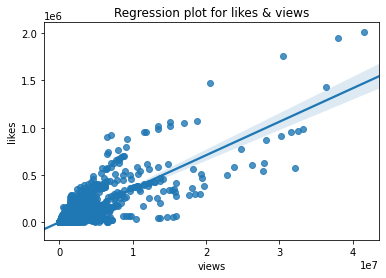

In [20]:
sns.regplot(data=videos,x='views',y='likes')
plt.title("Regression plot for likes & views")

##### dislikes vs views Analysis

Text(0.5, 1.0, 'Regression plot for dislikes & views')

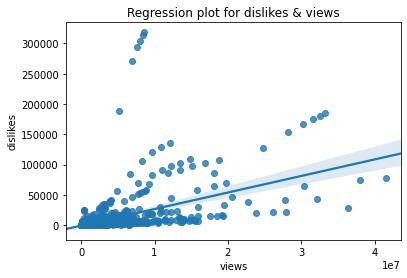

In [21]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title("Regression plot for dislikes & views")

##### Correlation matrix is the evidence of above analysis!

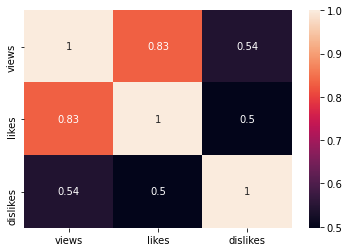

In [22]:
df_corr = videos[['views','likes','dislikes']]
sns.heatmap(df_corr.corr(),annot=True)

##### Analyse Emojis in comments

In [23]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [24]:
import emoji

In [25]:
!pip install emoji

In [25]:
len(comments)

691375

In [26]:
comments['comment_text'][4]

'trending 😉'

##### Every emoji has a Unicode associated with it 
     '\U0001F600' is a unicode for 😀

In [27]:
print('\U0001F600')

😀


In [28]:
comment='trending 😉'
[c for c in comment if c in emoji.UNICODE_EMOJI]

['😉']

In [29]:
str=''
for i in comments['comment_text']:
    list=[c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str=str+ele
    

In [30]:
len(str)

304745

##### lets create a dictionary of having each emoji with its frequency as well

In [31]:
result={}
for i in set(str):
    result[i]=str.count(i)
    
## result = {i : str.count(i) for i in set(str)}     

In [ ]:
### sort the emojis according to its count or frequency

In [41]:
final={}
for key,value in sorted(result.items(), key=lambda item: item[1]):
    final[key]=value
### final={k: v for k, v in sorted(res.items(), key=lambda item: item[1])}

In [45]:
## convert dictionary into list for this we have to unzip this dictionary
keys=[*final.keys()]
values=[*final.values()]

In [47]:
df = pd.DataFrame({'chars':keys[-20:], 'num':values[-20:]})
df

,chars,num
0,🤣,2279
1,🏼,2549
2,😢,2672
3,💙,2831
4,👌,3112
5,😬,3381
6,💜,3429
7,🏻,3438
8,😊,3596
9,♥,4909


In [65]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
trace=go.Bar(x = df['chars'],
             y = df['num']
            )
iplot([trace])                      